# COLX 521 Lab Assignment 2: Corpus Statistics

## Assignment Objectives

In this assignment you will 
- build and access lexicons
- calculate and compare statistics about corpora in multiple modalities
- learn how to transform a speech signal into mathematical features that can be used for ML.

Notes: 

- Exercises labeled with "T" (ie, T.3) are teamwork assignments.  Refer to the Teams folder in the repo to find your teammates.
- Speech can be considered an alternative modality to text.  We will be working with a library called OpenSmile, that converts the speech data into numerical representations.  Once it's in this form, you can use it just like you would any numerical data.


## Getting Started

This assignment requires that you have downloaded following NLTK corpora/lexicons

In [1]:
#provided code
import nltk
nltk.download("treebank")
nltk.download("cmudict")
nltk.download("brown")
nltk.download("movie_reviews")


[nltk_data] Downloading package treebank to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
[nltk_data] Downloading package brown to /Users/jungyeul/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

Run the code below so you can access them and other relevant packages

In [2]:
#provided code
from nltk.corpus import treebank,cmudict,brown,movie_reviews
from collections import defaultdict, Counter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Tidy Submission

rubric={mechanics:1}

To get the marks for tidy submission:

- Submit the assignment by filling in this jupyter notebook with your answers embedded
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions)

### Exercise T.3: Homophones (Lecture 3 Teamwork)
rubric={accuracy:2,efficiency:2,quality:1}

The CMU pronouncing dictionary, which is accessible using NLTK, contains information about the pronunciation of words. It is a dictionary whose keys are written words and whose values are lists of pronunciations (since words can have multiple pronunciations), where each pronunciation is a list of phones, represented as strings. In this exercise, your main task is to construct sets of words that share a pronunciation: these are known as homophones. For example the word _bear_ should appear in a set with the word _bare_ because they have the same pronunciation. (side note: words that are spelled the same, but pronounced differently (like present tense "read" and past tense "read", are called "homographs".  Together, homophones and homographs form "homonyms" - you don't need to worry about homographs in this exercise.)

There is an inefficient ($O(n^2)$) way to solve this problem which involves checking each pronunciation of each word against each pronunciation of every other word. You must not do this! A faster way to solve this problem is to reverse the CMU dictionary in one $O(n)$ pass, creating a lexicon which maps pronunciations to all words which have that pronunciation (this is called a "reverse index", and you will see them several times later in the program!).  The reverse index should have pronunciations as keys, and a list of spellings as values. The `values()` of that dictionary which have length greater than one are the sets of homophones that you want! Write code which generates and extracts those sets (you should probably have at least one function here!), then write some tests which show that the function(s) of your homophone finder are working correctly. (Hint: you may want to check that certain homophones that you know are identified correctly).

In [3]:
from nltk.corpus import cmudict

p_dict = cmudict.dict()

print(p_dict["read"], ' '.join(p_dict["read"][0]), '~~~', ' '.join(p_dict["read"][1]))
print(p_dict["bear"], ' '.join(p_dict["bear"][0]))
print(p_dict["bare"], ' '.join(p_dict["bare"][0]))

[['R', 'EH1', 'D'], ['R', 'IY1', 'D']] R EH1 D ~~~ R IY1 D
[['B', 'EH1', 'R']] B EH1 R
[['B', 'EH1', 'R']] B EH1 R


In [4]:
count = 0
for i, j in p_dict.items():
    print(i, j)
    if count > 10:
        break 
    count += 1

a [['AH0'], ['EY1']]
a. [['EY1']]
a42128 [['EY1', 'F', 'AO1', 'R', 'T', 'UW1', 'W', 'AH1', 'N', 'T', 'UW1', 'EY1', 'T']]
aaa [['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1']]
aaberg [['AA1', 'B', 'ER0', 'G']]
aachen [['AA1', 'K', 'AH0', 'N']]
aachener [['AA1', 'K', 'AH0', 'N', 'ER0']]
aaker [['AA1', 'K', 'ER0']]
aalseth [['AA1', 'L', 'S', 'EH0', 'TH']]
aamodt [['AA1', 'M', 'AH0', 'T']]
aancor [['AA1', 'N', 'K', 'AO2', 'R']]
aardema [['AA0', 'R', 'D', 'EH1', 'M', 'AH0']]


In [5]:
Cheatsheet (MDS-CL 2023-2024)

def build_rev_p_dict(p_dict):
    '''given the NLTK version of the CMU pronouncing dict, reverses the dictionary. The returned
    dict has pronunciation strings as keys and sets of homophone words as values'''

    rev_p_dict = defaultdict(set)
    ...

    # rev_p_dict['AH0'].add('a')

    return rev_p_dict

def get_homophone_sets(p_dict):
    '''given the NLTK version of the CMU pronouncing dict, extracts a list of sets, where each set
    contains words which are homophones'''
    ### Your code here
    rev_p_dict = build_rev_p_dict(p_dict)
    homophone = []
    ...
    return homophone
    ###

In [7]:
homophone_sets = get_homophone_sets(p_dict)

count = 0
for j in homophone_sets:
    print(j)
    if count > 10:
        break 
    count += 1

{'a', 'ae', 'ay', 'a.'}
{'aaker', 'ocker'}
{'encore', 'oncor', 'aancor'}
{'aaron', 'aron', 'aran', 'ehren'}
{'aarons', 'arens', "aaron's"}
{'aaronson', 'aronson'}
{'os', 'aase'}
{'osten', 'aasen'}
{'abadie', 'abadi'}
{'abie', 'abbie', 'abby', 'abbey', 'abbe'}
{'abet', 'abbett'}
{'abbott', 'abbot'}


In [8]:
# tests here
p_dict = cmudict.dict()
rev_p_dict = build_rev_p_dict(p_dict)

assert len(rev_p_dict) == 114966
assert "R EH1 D" in rev_p_dict
assert rev_p_dict["R EH1 D"] == ?

homophone_sets = get_homophone_sets(p_dict)
assert(len(homophone_sets) == 12827)
assert {...} in homophone_sets
assert {...} not in homophone_sets

print("Success!")

Success!


### Exercise T.4: Comparing Genres (Lecture 4 Teamwork)
rubric={accuracy:3,efficiency:1,viz:1,reasoning:2}

Pick 3 genres of the Brown (your choice, but best if they're fairly distinct), and do a comparison between them. You need to include at least:

- average sentence length
- percent of words in the corpus which are adjectives (JJ, JJR, JJS, JJT tags)
- lexical density
- 50 words strongly associated with each genre

You can adapt the code from the lecture for this, or code it however you like (as long as it is fairly efficient, using functions to avoid repeating code).  For the part about individual words, you can either divide or subtract word probabilities (whichever you think is more interesting/appropriate): for each word and each genre, use the average probability of the word in the two other genres for comparison. Include at least one appropriate visualization!

Then, discuss why you think you're seeing the results that you are. Were there any surprises?

There's quite a bit to do here, and you are strongly advised to divide this problem among your teammates!

A very thorough analysis can earn up to a bonus point (spark) for this question! 

In [9]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [10]:
categories = ["news", "religion", "fiction"]

In [11]:
# average sentence length = total_word/total_sent

news
average sentence length: 21.75081116158339
religion
average sentence length: 22.95979020979021
fiction
average sentence length: 16.118616144975288


In [13]:
# adj_percent = adj_tokens/total_tokens
# lex_density = open_class_tokens/total_tokens

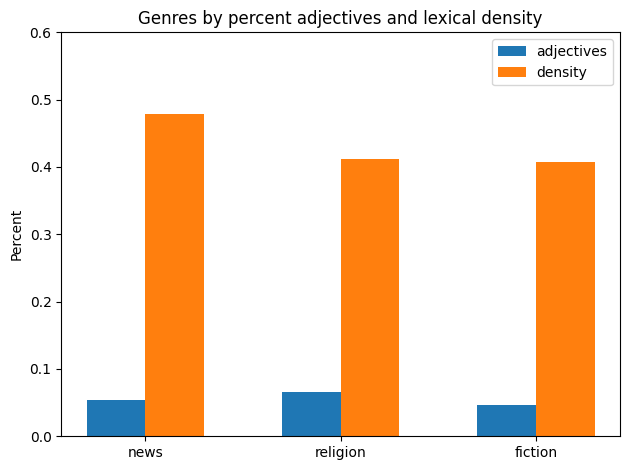

In [14]:
open_class_prefix = {"N", "V", "J", "R"}

adj_percent = []
lex_density = []

# ...

In [15]:
# HOW TO DEFINE "strongly associated with each genre"

# 1/ prob_cat_a['word'] >> (prob_cat_b['word'] + prob_cat_c['word'])/2 
# 2/ prob_cat_a['word'] >> prob_cat_b['word'] && prob_cat_a['word'] >> prob_cat_c['word'] 
# 3/ prob_cat_a['word'] >> average prob_cat_a[WORD] && 'word' not in cat_b && cat_c
# 4/ ... 

news
['game', 'also', 'club', 'court', 'program', 'sales', 'three', 'other', 'board', 'meeting', 'per', 'monday', 'four', 'yesterday', 'who', 'university', 'u.s.', 'tax', 'school', 'county', 'administration', 'national', 'government', ',', 'bill', 'city', 'kennedy', 'committee', 'week', 'after', 'new', 'first', 'two', 'home', 'state', 'year', 'president', 'by', 'mr.', 'last', 'has', 'on', 'at', 'mrs.', 'said', 'will', 'a', 'for', 'in', 'the']
religion
['born', 'jesus', 'members', 'but', 'death', 'england', 'membership', 'its', 'new', 'life', 'if', 'human', 'faith', 'by', 'power', 'has', 'so', 'christian', 'us', 'these', 'to', 'only', 'such', 'spirit', 'can', 'christ', 'may', 'our', '(', 'be', 'it', ':', 'church', 'world', 'or', ')', 'have', 'not', 'in', 'are', 'which', 'as', 'god', 'the', 'this', ';', 'we', 'that', 'is', 'of']
fiction
['where', 'my', 'get', 'little', 'go', 'around', 'eyes', 'came', 'old', "don't", 'thought', 'went', 'now', 'about', 'looked', 'there', 'back', 'on', 'did

Answer:

...

### Exercise 1: Acoustic features

In [17]:
# import sys

### !!! IMPORTANT !!! ###
# !python3 -m pip install install --upgrade pip
# !python3 -m pip install opensmile==2.5.0

We will be using a function called "process_file" to process every file in a directory - it reads in the path_name of a file, and produces a data frame consisting of a set of features.  We will be using the extended Geneva Minimalistic Acoustic Parameter Set (eGMAPs) feature set, which consists of 88 features belonging to several different classes (you don't need to know what all of these features are, exactly, but if you are interested in learning more, you can look [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7160715)):

   * Pitch features: Pitch is how "high" or "low" a voice sounds, in Hz (Hertz - beats / second). Pitch is indicated by the "fundamental frequency" of a speech signal (also written as F0, and called "F-Zero").  It is inversely-correlated with the length of the vocal cords, which is why men tend to have lower voices than women or children.
   
   * Amplitude features: Amplitude is, roughly speaking, the "loudness" of a signal, and is concerned with peaks in the energy wave.
   
   
   * Spectral features define properties about the frequency and amplitude of the sound wave.  Some of the most important spectral features related to speech are called "formants", and are labeled F1-FN.  The lower formants (F1-F3), in particular, are very important for the recognition of phones.  F1 and F2 are used to determine vowel quality (/i/ -> the "ee" vowel, has a very low F1, and a very high F2; /ɑ/, the "ah" vowel, has a very high F1, and a lower F2, etc.  Other spectral features, such as *jitter* and *shimmer*, measure changes in F0's frequency and amplitude, respectively, between timesteps.
      
   
   First, we'll be creating a data set by using process_file to transform the files in speech_data to a feature set.  You should get a dataframe with 250 instances with 88 features each.  Hint: you can use the os.walk function to loop through all the files in a directory.)
  


In [18]:
# 1/ how to read a list of files using `os.walk`, 
# 2/ how to process/extract features from audio files using `features = smile.process_file`,
# 3/ how to put them in pandas: pandas.concat([data,features])  where `data =  pandas.DataFrame()`

In [19]:
import opensmile
import pandas as pd
import os
from tqdm import tqdm
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
### Your code here ###
data = 
audio_files = "./opensmile/TRAIN/"
for root, _, files in os.walk(audio_files):
    for file in files:
        # ...


### Your code here ###

##### 1.2

rubric={accuracy:3}

Next, we're going to try to identify features that might be good for learning a sentiment analysis classifier.  Read in the file Train.csv, and convert "Negative" to -1, "Neutral" to 0, and "Positive" to +1. This should give you a data-frame of 250 items, each with a single dependent variable.

For each feature in our data set, calculate the Spearman's rank coefficient for the variable, and sort your features by the absolute value of this variable (why not rank them by just the value?).  We'll be covering rank coefficient in later classes, but it calculates a correlation in the ordering of the items: 1.0 suggests that "Positive" documents have a high value for the variable, "Negative" documents have a low value, and "Neutral" documents are somewhere in between; -1.0 suggests the opposite, and values close to 0 suggest no correlation.  The *spearmanr* function expects two arrays - make sure that your data is not still in a data frame when you pass it to the function.

Note: make sure that your features and classes match - your functions may read the files in in different orders.  You may need to re-order the classes that you read in in the csv file.

You need to do 3 operations:
1. Read the Train.csv into a dictionary *targets* that contains the filename as the key, and the sentiment (-1, 0, 1) as the value.
```
# Filename,Class
# 346.wav,Negative      --> -1
# 163.wav,Neutral       --> 0
# ...
# 5.wav,Positive        --> 1
```

2. Create a numpy array *classes* that contains the sentiment scores in the same order as the data structure you created in 1.1.
```
for i in data.iloc:
    print(i)
    print(i.name[0])

    print(targets[file_name])   --> append to `classes` -->  then, np.array(classes)

```

3. Calculate the ranked spearman correlation between your data and the classes.  Create a list containing tuples (feature_name, correlation); sort the list by the correlation, in descending order.
```
`spearmanr` with ith data and classes
you may want to change the return value of `spearmanr` with `abs`, which will be your tuple with `i`:  
`(i, abs(spearmanr_result))`
```
see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [23]:
count = 0
for i in data.iloc:
    print(i)
    print(i.name[0])
    print(os.path.split(i.name[0])[-1])
    print(targets[name])        
    break 

F0semitoneFrom27.5Hz_sma3nz_amean             0.000000
F0semitoneFrom27.5Hz_sma3nz_stddevNorm        0.000000
F0semitoneFrom27.5Hz_sma3nz_percentile20.0    0.000000
F0semitoneFrom27.5Hz_sma3nz_percentile50.0    0.000000
F0semitoneFrom27.5Hz_sma3nz_percentile80.0    0.000000
                                                ...   
MeanVoicedSegmentLengthSec                    0.000000
StddevVoicedSegmentLengthSec                  0.000000
MeanUnvoicedSegmentLength                     2.300000
StddevUnvoicedSegmentLength                   0.000000
equivalentSoundLevel_dBp                     -3.807307
Name: (./opensmile/TRAIN/275.wav, 0 days 00:00:00, 0 days 00:00:02.377142857), Length: 88, dtype: float32
./opensmile/TRAIN/275.wav
275.wav
-1


In [21]:
import csv
import numpy as np
targets = {}
classes = []


### Read in CSV file
with open("./opensmile/TRAIN.csv") as csvfile:
    # ...


### Re-order classes to be in same order as X-side data.
for i in data.iloc:
    # results should be appended to `classes`

classes = np.array(classes)


In [22]:
from scipy.stats import spearmanr
correlations = []
import math

for i in data:
    print(np.array(data[i]), classes)
#     cor, p = spearmanr(X, classes)
#     cor = abs(cor)
#     correlations.append((i, cor))
# correlations = sorted(correlations, key=lambda x: x[1], reverse=True)
    break 

[ 0.       27.923246 27.616077 26.974255 28.524914  0.       26.130066
  0.       27.718287  0.       27.052464  0.       26.84621   0.
 27.199451 28.134117 26.715942  0.       29.521318 27.060596 27.085302
  0.       26.078522  0.        0.       27.457468 27.08951   0.
  0.       28.250963 27.47989   0.       27.067898 26.975119 27.03469
 27.619026 27.576824 27.82539  26.845097  0.        0.        0.
 27.55262   0.       28.138527  0.       29.09091  28.115582 27.35082
 27.849318 28.134884 27.7279    0.        0.       26.738972 27.502972
 23.198082 27.231953 27.337889 27.452139 26.916979  0.        0.
 26.851776  0.       27.38088   0.       27.923157 30.165234  0.
  0.       27.745296  0.       28.899874  0.       28.224504 27.71329
 27.508121 29.334883 27.424416  0.       22.68777   0.       27.629934
 27.539377 25.297983 27.63491  26.427753 27.309385 27.029436 26.550295
  0.       27.867323 27.29493  26.680492 24.78723  27.548193 30.331163
 27.925209 27.926283 29.355864  0.     

In [24]:
from scipy.stats import spearmanr
correlations = []
import math

for i in data:
    # ...

In [25]:
correlations

[('mfcc1V_sma3nz_amean', 0.2099267483028794),
 ('F1frequency_sma3nz_amean', 0.20881643142591008),
 ('mfcc1_sma3_amean', 0.19975211351481237),
 ('slopeUV0-500_sma3nz_amean', 0.18745066968212662),
 ('mfcc4_sma3_stddevNorm', 0.18063979974674654),
 ('slopeUV500-1500_sma3nz_amean', 0.1565102795593888),
 ('loudness_sma3_percentile20.0', 0.15471949736123558),
 ('F3frequency_sma3nz_amean', 0.1538476882641244),
 ('F3frequency_sma3nz_stddevNorm', 0.15040186301773548),
 ('slopeV500-1500_sma3nz_amean', 0.14964774009236556),
 ('F2frequency_sma3nz_amean', 0.14515895250973904),
 ('alphaRatioV_sma3nz_amean', 0.14070446202454023),
 ('shimmerLocaldB_sma3nz_stddevNorm', 0.12773159485993074),
 ('hammarbergIndexV_sma3nz_amean', 0.12114685212987819),
 ('logRelF0-H1-A3_sma3nz_amean', 0.11641715842917456),
 ('loudness_sma3_pctlrange0-2', 0.11638525676944124),
 ('StddevUnvoicedSegmentLength', 0.11586895474416674),
 ('F1frequency_sma3nz_stddevNorm', 0.1153874190702585),
 ('slopeV0-500_sma3nz_amean', 0.114851062

##### 1.3 Optional (Feature selection)

rubric={accuracy:1, reasoning:1}

When selecting features, we often try to increase efficiency by eliminating features that are unlikely to have an impact on the model.  There are several ways of selecting features, but we're going to select features that have a high correlation with the class ordering (that's why we linearized the classes to [-1, 0, 1]).

Train an sklearn decision tree classifier (max_depth=5) using the features you've extracted.  Train one with all of the features, one with the 20 that you've identified as the best, and one with the 20 you've identified as the worst.  Run each model 100 times, and average the accuracies (you can use the metrics.accuracy_score() function to calculate the accuracy of your classifier).  Can we note any trends?  Explain briefly what this might mean.

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.20,random_state=42) # 80% training and 20% test


In [ ]:
### Your code here ###


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics

# clf = DecisionTreeClassifier(max_depth=5)

# ### Your code here ###

# ### Your code here ###

# print("Full Average Accuracy:",np.average(full_scores))
# print("Best Average Accuracy:", np.average(best_scores))
# print("Worst Average Accuracy:", np.average(worst_scores))


In [ ]:
# Analysis Answer: 



### Exercise 2: Readability

[Flesh Reading Ease](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests) is calculated using the following formula:

\begin{equation*}
206.835-1.015 \left({\frac {\text{total words}}{\text{total sentences}}}\right) -84.6\left({\frac {\text{total syllables}}{\text{total words}}}\right)
\end{equation*}

Scores above 70 indicate text which are appropriate for primary school school students, scores between 70 and 50 indicate texts which can be read by secondary school students, and scores below 50 are appropriate only for college students.

#### 2.1

rubric={accuracy:3}

First, write a function which uses the CMU dictionary to count the number of syllables in a word. The number of syllables can be most easily determined by counting the number of ARPAbet phones in the word which end with a digit (0,1, or 2), indicating the level of stress on a vowel. 
- For our purposes here, just use the first pronounciation provided. 
- If a word does not appear in the CMU, you can default to the guess that the number of syllables is equal to the number of vowels (be careful about case here, be sure to lowercase before you check the vowels!).

In [26]:
vowels = {"a","e","i","o","u","y"}
p_dict = cmudict.dict() # keep this outside as a global variable so you aren't reloading each time

def get_syllables(word):
    '''use CMU dict (p_dict) to count the number of syllables in word, default to number of vowels'''
    syllable_count = 0
    #your code here
    # ...

    #your code here
    return syllable_count

In [27]:
assert get_syllables("readability") == 5
assert get_syllables("blabglob") == 2
print("Success!")

Success!


#### 2.2 Code Review

rubric={accuracy:3, reasoning:1}

A function has been provided which calculates the reading ease of the sentence; however, it is not very good code.  Perform a code review, explaining in a few sentences how this code could be improved.  Secondly, write a function that correctly calculates the reading ease of a sentence.  You can use the formula provided above to calculate the reading ease.  The number of sentences will be 1 (this function calculates the reading ease for a single sentence), and the number of syllables will be calculated using the function you wrote in 2.1.  You should exclude words that have non-alphabetic characters (you can use _isalpha_).  If your sentence has no words, return None.


In [28]:
def get_reading_ease(sentence):
    '''calculate the Flesh reading ease for a single sentence consisting of a list of words (strings)'''
    total_syllables = 0
    num_words = 0
    for word in sentence:
        if not word.isalpha():
            sentence.remove(word)
        else:
            num_words += 1
            total_syllables += get_syllables(word)
    print("Syllables: ", total_syllables)
    reading_ease = 206.835 - 1.015 * num_words - 846 * (total_syllables/num_words) 
    return reading_ease

In [29]:
sentence = "This is a fea342 test".split(" ")
print(get_reading_ease(sentence))
print(sentence)

Syllables:  3
-642.21
['This', 'is', 'a', 'test']


Your written answer here:


In [30]:
def get_reading_ease(sentence):
    '''calculate the Flesh reading ease for a single sentence consisting of a list of words (strings)'''
    # your code here
    
    # ...
    # your code here
    return reading_ease


In [31]:
assert 100 < get_reading_ease(["I", "am", "done", ",","man"]) < 140
assert -60 < get_reading_ease(["Felicitations", "for", "achieving", "a", "thoroughly", "excellent", "resolution", "to", "an", "altogether", "indombidable", "conundrum", "of", "humongous", "proportions", "."]) <-20
assert get_reading_ease(["?"]) == None
print("Success!")

Success!


#### 2.3

rubric={accuracy:2,quality:1}

Finally, use the function you just wrote to calculate the average reading ease (across all sentences) for two NLTK corpora: the Penn Treebank (treebank), and the Movie Review corpus (movie_reviews). You should print out your results, and it should be clear which is which. Note the quality point for this problem, make sure to document and avoid repeated code! Save the result in variables `penn_readability` and `review_readability` and run the tests to confirm your results are correct.

Note, if `get_reading_ease` returns None, you should skip over that sentence for the purposes of these calculations.

In [32]:
def calculate_avg_reading_ease(corpus):
    '''calculate and return average Flesh reading ease for all sentences in a corpus'''
    total_sents = 0
    total_ease = 0
    

    # ...
    return total_ease/total_sents


penn_readability = calculate_avg_reading_ease(treebank)
review_readability = calculate_avg_reading_ease(movie_reviews)

print("Treebank readability")
print(penn_readability)
print("Movie review readability")
print(review_readability)


Treebank readability
47.123132451339806
Movie review readability
59.39520661660777


In [33]:
assert 40 < penn_readability < 50
assert 55 < review_readability < 65
print("Success!")

Success!


#### 2.4 

rubric={reasoning:1}

Do these results make sense given the genre of these texts? Why?

Answer:
